In [238]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [239]:
new_customers = pd.read_excel('Raw_data.xlsx', sheet_name = 1)

## NewCustomerList.xlsx: 
    
#### This dataset included the new customers who visted the automobile bike company recently.

# Data Analysis Customer Segmentation

## Goal of the project

The purpose of this project is to conduct a Customer Segmentation Analysis for an Automobile bike Company. Customer segmentation is performed by developing a RFM Model. RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. In this analysis the customer segment was divided into 11 groups. The analysis will help in determining which customers segments should be targeted in order to enhance sales revenue for the company

## Columns Description

### New-customers Worksheet
#### first_name: This column has the first names of all customers
#### last_name: This column has the last names of all customers
#### gender: this column has the information about genders of the customers(male or female)
#### past_3_years_bike_related_purchases: This column contains informtion about how many times a customer has purchased thing related to bike in the past 3 years
#### DOB: this column conatins date of birth of every customer
#### Job_title: this columns contains information of job titles for every customer
#### job-industry_category: This column has the information about inustries each customer works in
#### Wealth_segment: This column contains information about the customers on how rich or poor they are
#### deceased_indicator: This column tells us whether a customer is dead or not
#### owns_car: This column tells us whether a customer owns a car or not
#### Tenure: this column will tell us about how long a customer owns a car
#### Address: this column has address of every customer
#### postcode: this column has postalcode of every customer
#### State: This column tells us in which state a customer lives
#### country: This column will tell us in which country ecag customer lives
#### Propert_valuation: Will tell us about the  assessment of customers property's value, based on the location, condition and multiple other factors
#### Rank: This columns has the information about rank of each cuatomer
#### Value: This column has the information about the valus of each customer

# Dirty Data

1. Some Missing values in last_name column --> Completeness
2. Some Missing values in DOB column --> Completeness
3. Misisng vaues in job_title Column --> Completeness
4. Misisng values in Job)industry_category column --> Completeness
5. DOB column has object datatype --> Validity
6. Gender has Object dataType, should be category --> Validity
7. Gender has some other values other than male and female --> Accuracy
8. Value column has inconsistency in decimal part --> Consistency

# Messy Data

2. Rank column appears two times 
4. 5 unkonwn columns present in the dataframe 



In [240]:
new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [241]:
new_customers.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,1.07,1.0700,1.070000,1.070000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.90,0.9000,1.125000,0.956250,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.66,0.8250,0.825000,0.825000,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.78,0.9750,0.975000,0.828750,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.59,0.7375,0.921875,0.783594,1000,1000,0.340


In [242]:
new_customers.sample(20)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
509,Gaultiero,Fibbens,Male,41,1980-03-14,Help Desk Technician,NaN,Affluent Customer,N,No,...,NSW,Australia,11,0.67,0.6700,0.837500,0.837500,507,507,0.850000
98,Bengt,Bilson,Male,26,1972-11-02,Structural Engineer,Manufacturing,High Net Worth,N,No,...,NSW,Australia,10,0.89,0.8900,1.112500,1.112500,99,99,1.296875
272,Theresa,Cowper,Female,99,1976-08-24,Accountant III,Manufacturing,Mass Customer,N,No,...,NSW,Australia,10,0.95,0.9500,1.187500,1.009375,271,271,1.060000
649,Truman,Arlett,Male,58,1958-06-25,Technical Writer,Manufacturing,High Net Worth,N,Yes,...,NSW,Australia,5,1.02,1.2750,1.275000,1.275000,648,648,0.725000
472,Sigismund,Sedger,Male,9,1999-11-29,Accountant II,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,10,0.45,0.4500,0.562500,0.562500,473,473,0.884000
606,Maximilian,Geffen,Male,96,1955-07-13,Automation Specialist III,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,8,0.83,1.0375,1.296875,1.102344,606,606,0.765000
816,Rowen,Sollas,Male,38,1960-04-23,Dental Hygienist,Health,Mass Customer,N,No,...,QLD,Australia,8,0.62,0.6200,0.620000,0.527000,817,817,0.586500
713,Miran,Runchman,Female,47,1975-07-09,Nurse,Retail,Mass Customer,N,No,...,QLD,Australia,3,0.50,0.5000,0.500000,0.425000,708,708,0.680000
784,Winn,Wells,Male,66,1994-04-12,Analyst Programmer,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,10,0.91,0.9100,1.137500,1.137500,785,785,0.620000
332,Nil,Shirer,Male,64,1997-09-27,Librarian,Entertainment,Mass Customer,N,Yes,...,VIC,Australia,8,0.56,0.7000,0.700000,0.595000,329,329,1.000000


In [243]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [244]:
new_customers.shape

(1000, 23)

In [245]:
new_customers.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [246]:
new_customers.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [247]:
new_customers[new_customers.duplicated()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [248]:
new_customers.duplicated(["first_name",'last_name']).sum()

0

In [249]:
new_customers.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747270,0.839145,0.944456,0.872373,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.210585,0.254564,0.306850,0.293649,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.620000,0.700000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.825000,0.920000,0.839375,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.040000,1.156250,1.075000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


# Numeric Column , Non numeric columns


In [250]:
df_numeric = new_customers.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = new_customers.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


# Checking Missing values


As there are 2.9% of value missing in last_name column, we will replace it with none beacuse the first_name has no missing values, so the none values in last_name will not affect the data


In [251]:
new_customers["last_name"].isnull().sum()

29

In [252]:
new_customers[new_customers["last_name"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,...,NSW,Australia,11,0.83,0.8300,1.037500,0.881875,13,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,...,VIC,Australia,5,0.45,0.5625,0.562500,0.478125,57,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,...,NSW,Australia,12,0.57,0.5700,0.712500,0.712500,88,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.60,0.7500,0.937500,0.796875,155,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,9,0.46,0.5750,0.718750,0.718750,202,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,4,0.99,1.2375,1.237500,1.051875,326,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,...,QLD,Australia,3,0.52,0.5200,0.520000,0.520000,329,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,11,0.64,0.6400,0.800000,0.800000,358,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,...,NSW,Australia,1,1.02,1.0200,1.020000,0.867000,420,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,...,NSW,Australia,2,0.74,0.9250,0.925000,0.786250,441,441,0.901000


In [253]:
new_customers["last_name"].fillna("None", inplace=True)

#### There are no missing values in last_name

In [254]:
new_customers["last_name"].isnull().sum()

0

In [255]:
new_customers[new_customers["last_name"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


#### More missing value is in DOB column, so we will drop those rows where missing value is 

#### the missing valus is less than 3%

In [256]:
new_customers["DOB"].isnull().sum()

17

In [257]:
new_customers[new_customers["DOB"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.74,0.7400,0.740000,0.629000,57,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,...,NSW,Australia,9,0.97,1.2125,1.515625,1.515625,226,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,...,VIC,Australia,3,0.89,1.1125,1.112500,0.945625,324,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,...,QLD,Australia,8,0.51,0.5100,0.510000,0.510000,358,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,...,VIC,Australia,7,0.52,0.6500,0.650000,0.552500,361,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,...,QLD,Australia,6,0.88,0.8800,0.880000,0.748000,375,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.82,0.8200,0.820000,0.697000,433,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,...,VIC,Australia,6,0.64,0.8000,1.000000,0.850000,436,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,...,NSW,Australia,7,0.76,0.7600,0.760000,0.646000,575,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.275000,599,599,0.775000


In [258]:
values_to_be_dropped = new_customers[new_customers['DOB'].isnull()].index
values_to_be_dropped

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [259]:
new_customers.drop(index=values_to_be_dropped, axis=0, inplace=True)

##### no missing values in DOB column

In [260]:
new_customers["DOB"].isnull().sum()

0

### There are around 11% missing value  in job title, so we will replcae the missing values with "Missing"

In [261]:
new_customers["job_title"].isnull().sum()

105

In [262]:
new_customers[new_customers["job_title"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,8,0.50,0.6250,0.78125,0.781250,16,16,1.562500
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,...,QLD,Australia,4,0.49,0.4900,0.49000,0.416500,26,26,1.468750
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,...,VIC,Australia,10,0.76,0.7600,0.95000,0.950000,30,30,1.460938
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,...,NSW,Australia,8,0.53,0.6625,0.66250,0.662500,30,30,1.460938
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,VIC,Australia,8,0.89,0.8900,0.89000,0.756500,38,38,1.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,...,VIC,Australia,3,0.43,0.4300,0.43000,0.365500,951,951,0.450500
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,11,0.42,0.5250,0.65625,0.557812,954,954,0.450000
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,...,VIC,Australia,6,0.93,0.9300,0.93000,0.930000,972,972,0.430000
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,...,NSW,Australia,10,0.62,0.7750,0.96875,0.823437,972,972,0.430000


In [263]:
new_customers["job_title"].fillna("Missing", inplace=True)

##### no missing values in DOB column

In [264]:
new_customers["job_title"].isnull().sum()

0

### There are around 17 % null Values in Job_industry_category. so we will replace the null values with "Missing"

In [265]:
new_customers["job_industry_category"].isnull().sum()

165

In [266]:
new_customers[new_customers["job_industry_category"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,...,QLD,Australia,4,0.84,0.8400,0.8400,0.714000,23,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17 00:00:00,Quality Control Specialist,NaN,Affluent Customer,N,Yes,...,NSW,Australia,8,0.78,0.9750,0.9750,0.975000,23,23,1.500000
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,...,QLD,Australia,9,0.73,0.7300,0.9125,0.775625,32,32,1.453125
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,...,NSW,Australia,10,0.88,0.8800,1.1000,1.100000,36,36,1.447656
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,...,NSW,Australia,8,0.80,0.8000,0.8000,0.800000,44,44,1.421094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,...,VIC,Australia,4,0.90,0.9000,0.9000,0.765000,960,960,0.442000
971,Frieda,Tavinor,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,...,VIC,Australia,6,0.93,0.9300,0.9300,0.930000,972,972,0.430000
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,...,VIC,Australia,6,1.05,1.3125,1.3125,1.312500,974,974,0.425000
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,...,NSW,Australia,8,0.45,0.5625,0.5625,0.478125,979,979,0.416500


In [267]:
new_customers["job_industry_category"].fillna("Missing", inplace=True)

In [268]:
new_customers["job_industry_category"].isnull().sum()

0

#### There are five coummns in the dataframe that are unknown and makes no sense, so we will drop them

In [269]:
new_customers.drop(columns=["Unnamed: 16"], inplace = True)

In [270]:
new_customers.drop(columns=["Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20"], inplace = True)

#### The datatype of DOB coumn is Object, so we wil change it to datetime datatype

In [271]:
new_customers["DOB"]= pd.to_datetime(new_customers["DOB"])

In [272]:
new_customers.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

#### The datatype of Gender Coulumn is Object, so we will change it to category datatype

In [273]:
new_customers["gender"]=new_customers["gender"].astype('category')

In [274]:
new_customers.dtypes

first_name                                     object
last_name                                      object
gender                                       category
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

#### Values in value column have many decimal points, we will round these to 2

In [275]:
new_customers["Value"]=round(new_customers["Value"],2)

In [276]:
new_customers["Value"]

0      1.72
1      1.72
2      1.72
3      1.70
4      1.70
       ... 
995    0.37
996    0.36
997    0.36
998    0.36
999    0.34
Name: Value, Length: 983, dtype: float64

#### Creating Age Column to know which age group are our new_customers

In [277]:
def age(born_date):
    today = date.today()
    return today.year - born_date.year - ((today.month, today.day) < (born_date.month, born_date.day))

new_customers["age"]=new_customers["DOB"].apply(age)

In [278]:
new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.72,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.72,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.72,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70,58


#### Descriptive Statistics of Age column

In [279]:
new_customers["age"].describe()

count    983.000000
mean      52.088505
std       17.080894
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: age, dtype: float64

In [280]:
new_customers["age_group"]=new_customers["age"].apply(lambda x: (math.floor(x/10)+1) * 10)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

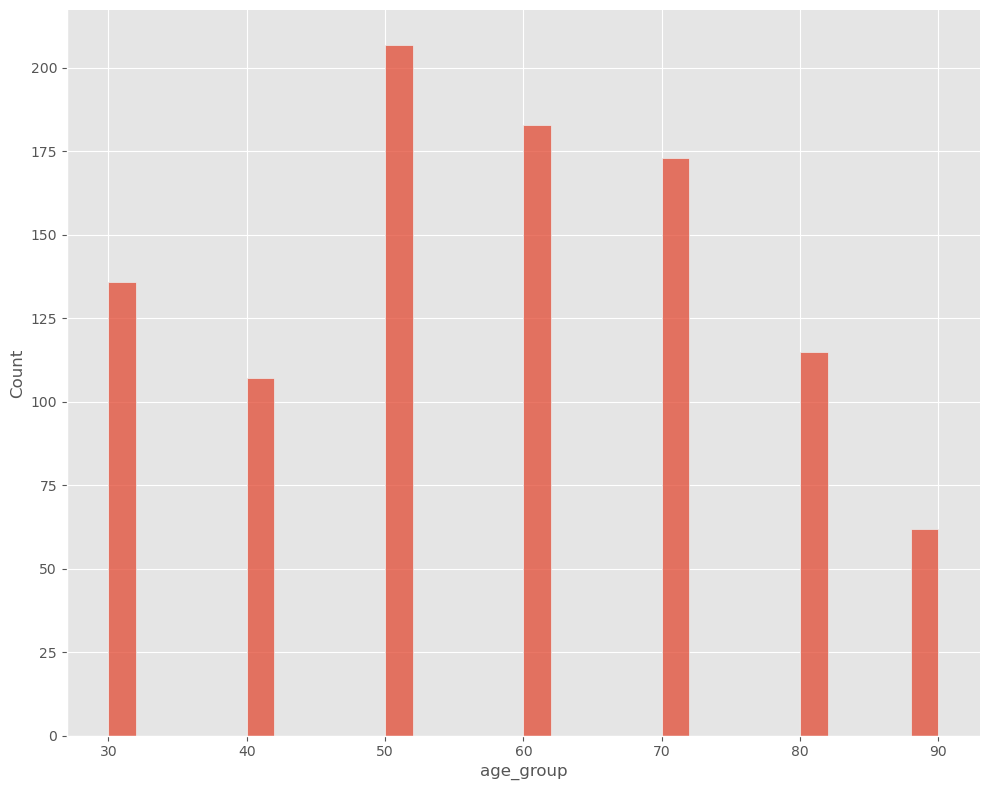

In [281]:
plt.figure(figsize=(10,8))
sns.displot(new_customers["age_group"], bins=30, height=8, aspect=1.25)
plt.show()

#### The highest number of New Customers are from the Age Group 50-59.

# Exporting the Cleaned New Customers Data Set to csv

In [283]:
new_customers.to_csv("new_customers_cleaned", index=False)